In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
from matplotlib.ticker import PercentFormatter
from scipy.optimize import curve_fit

In [3]:
def plot_graphs(file_path,app):
    # Read the CSV file with a two-row header
    df = pd.read_csv(file_path, header=[0, 1])

    # Combine multi-level columns for easier access, assuming 'System' is the prefix for all relevant columns
    df.columns = [' '.join(col).strip() for col in df.columns.values]

    # Calculate EXEC*2, WRITE+READ, and include System INST for processing
    df['EXEC*2'] = df['System EXEC'] * 2
    df['WRITE+READ'] = df['System WRITE'] + df['System READ']
    if 'System INST' in df.columns:
        df['INST'] = df['System INST']  # Assuming you want to use the data as is

    # Group by each 5 rows and calculate the average
    grouped_df = df[['EXEC*2', 'WRITE+READ', 'INST']].groupby(df.index // 5).mean()

    # Create a time column for plotting, representing each half second (since each group is 0.5 seconds)
    grouped_df['Time'] = grouped_df.index * 0.5

    # Set up a plot with three subplots (1 row, 3 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plotting EXEC*2 vs Time on the first subplot
    ax1.plot(grouped_df['Time'], grouped_df['EXEC*2'], label='IPC', color='blue')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('IPC')
    ax1.legend()
    ax1.set_title(app)
    ax1.grid(True)

    # Plotting WRITE+READ vs Time on the second subplot
    ax2.plot(grouped_df['Time'], grouped_df['WRITE+READ'], label='Memory Throughput', color='green')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Memory Throughput (GB/s)')
    ax2.legend()
    ax2.set_title(app)
    ax2.grid(True)

    # # Plotting INST vs Time on the third subplot, if available
    # if 'INST' in grouped_df.columns:
    #     ax3.plot(grouped_df['Time'], grouped_df['INST'], label='INST', color='red')
    #     ax3.set_xlabel('Time (seconds)')
    #     ax3.set_ylabel('INST')
    #     ax3.legend()
    #     ax3.grid(True)
    # else:
    #     print("Column 'System INST' not found in the data.")

    # Display the entire plot
    
    plt.tight_layout()
    plt.show()

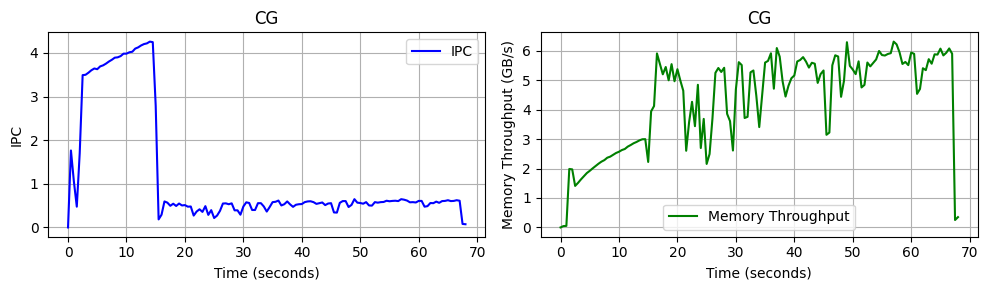

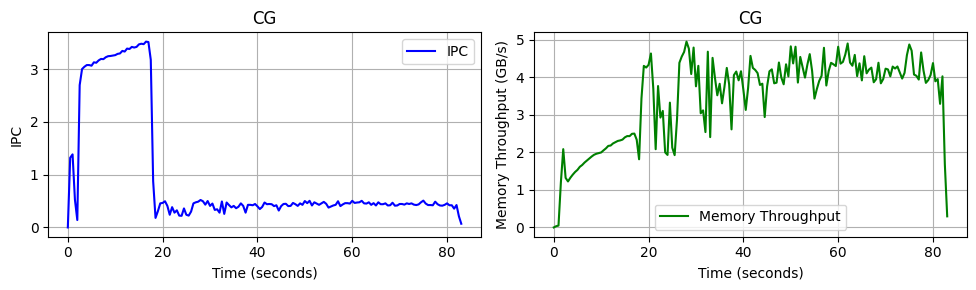

In [4]:
base_dir = './cpu_performance/cg'
# cpu_caps = [80, 100, 120, 140, 160, 180, 200, 220, 240, 250]
cpu_caps = [250,180]
for cap in cpu_caps:
    file_path = f'{base_dir}/pcm_cg_{cap}.csv'
    plot_graphs(file_path,"CG")

In [5]:
base_dir = './npb_performance/bt'
# cpu_caps = [80, 100, 120, 140, 160, 180, 200, 220, 240, 250]
cpu_caps = [250,160]
for cap in cpu_caps:
    file_path = f'{base_dir}/pcm_bt_{cap}.csv'
    plot_graphs(file_path)

TypeError: plot_graphs() missing 1 required positional argument: 'app'

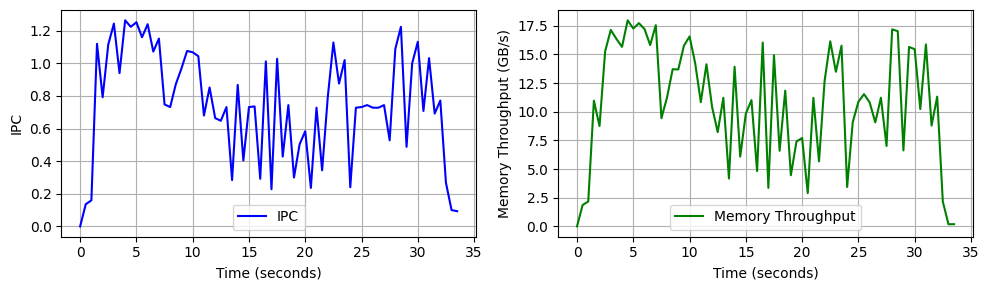

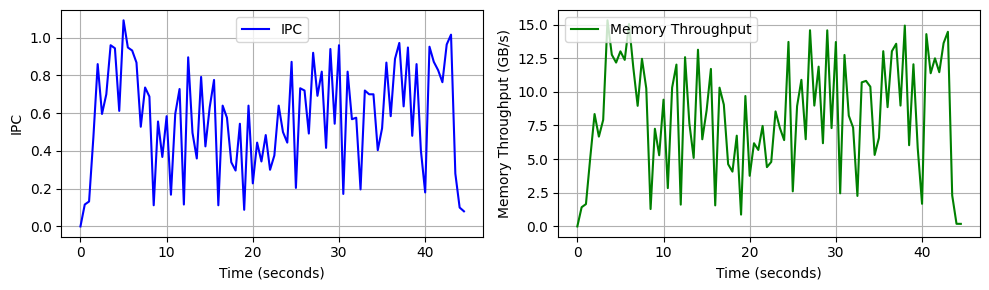

In [13]:
base_dir = './npb_performance/mg'
# cpu_caps = [80, 100, 120, 140, 160, 180, 200, 220, 240, 250]
cpu_caps = [250,160]
for cap in cpu_caps:
    file_path = f'{base_dir}/pcm_mg_{cap}.csv'
    plot_graphs(file_path)

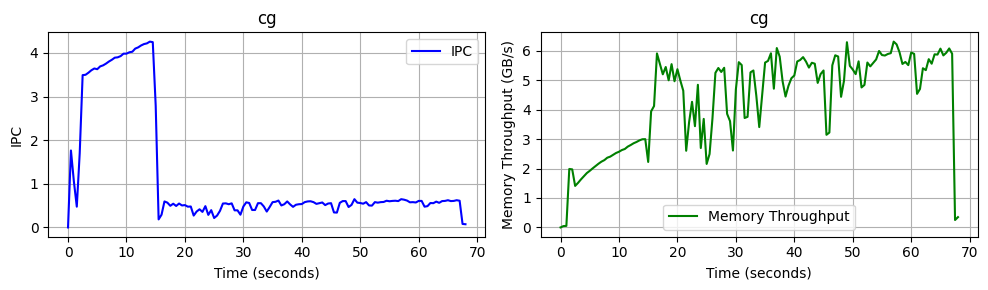

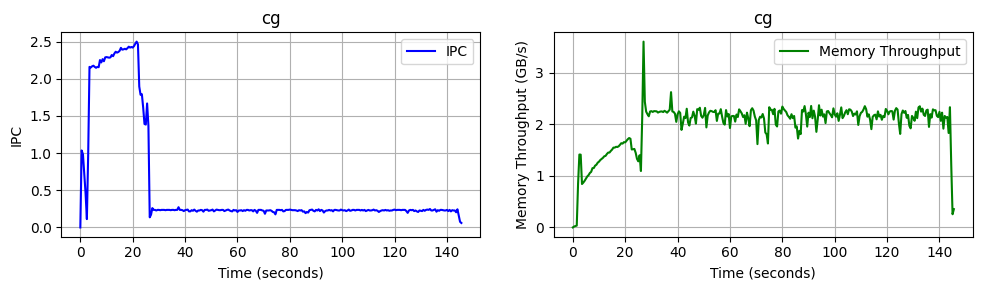

In [7]:
base_dir = './cpu_performance/cg'
# cpu_caps = [80, 100, 120, 140, 160, 180, 200, 220, 240, 250]
cpu_caps = [250,140]
for cap in cpu_caps:
    file_path = f'{base_dir}/pcm_cg_{cap}.csv'
    plot_graphs(file_path,"cg")

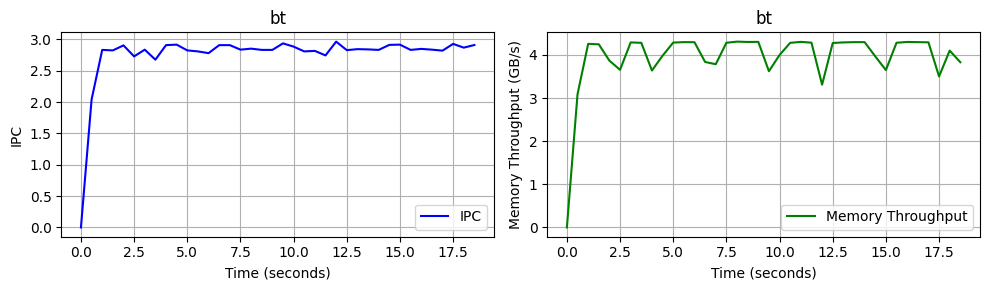

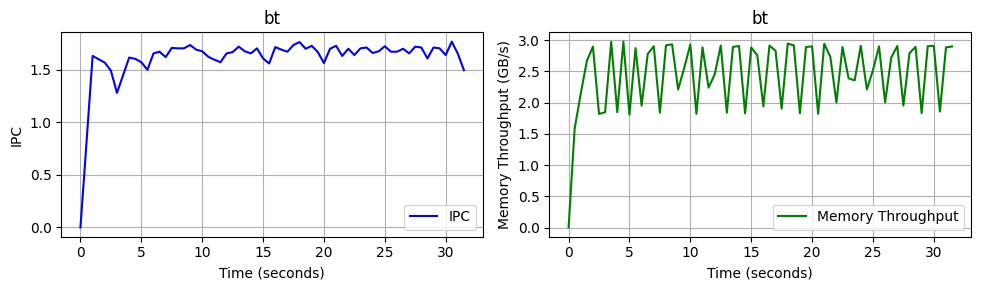

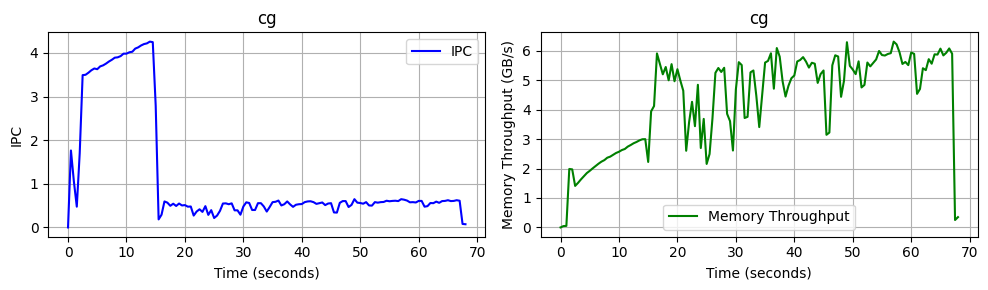

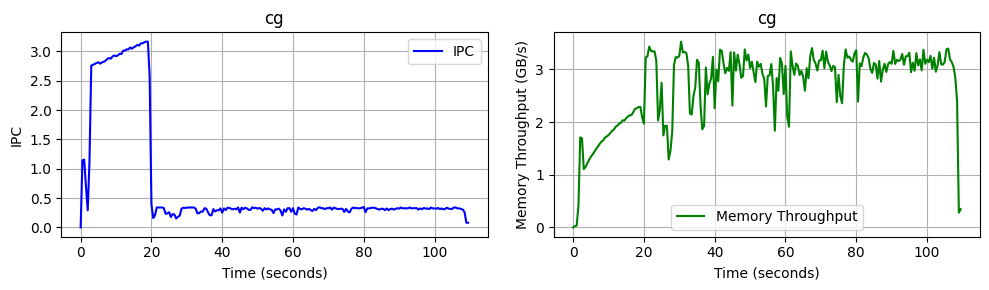

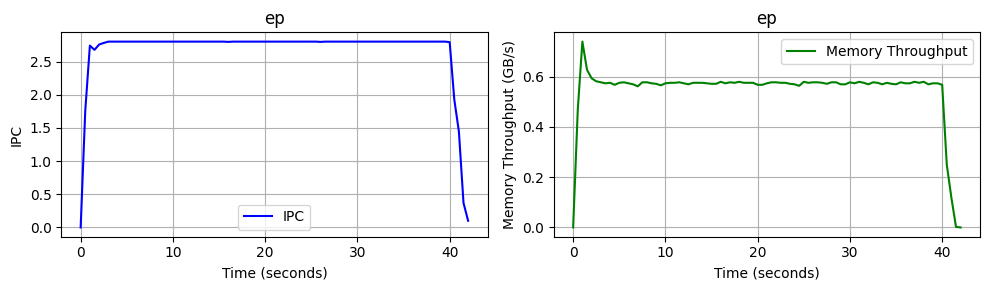

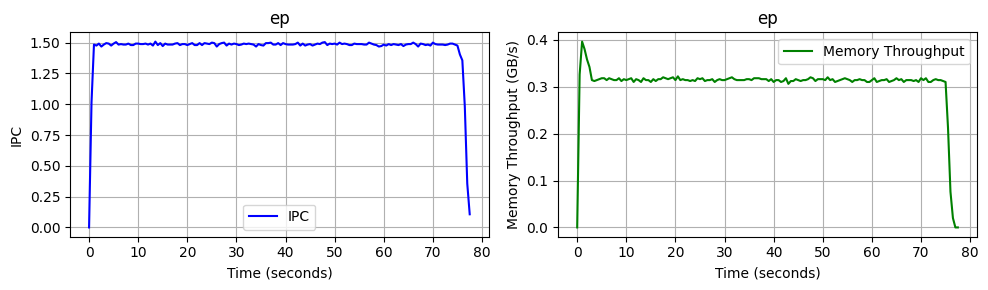

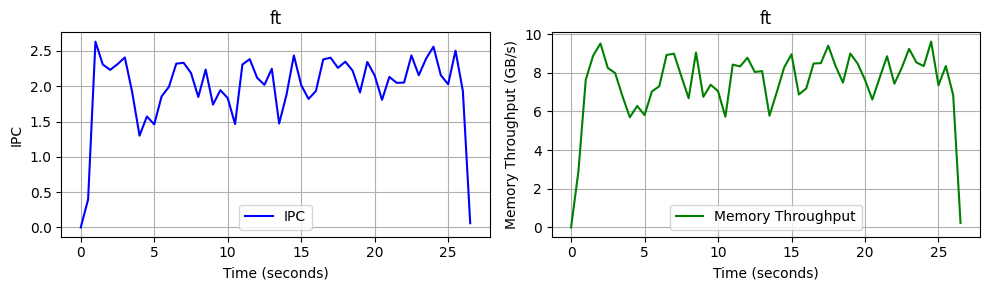

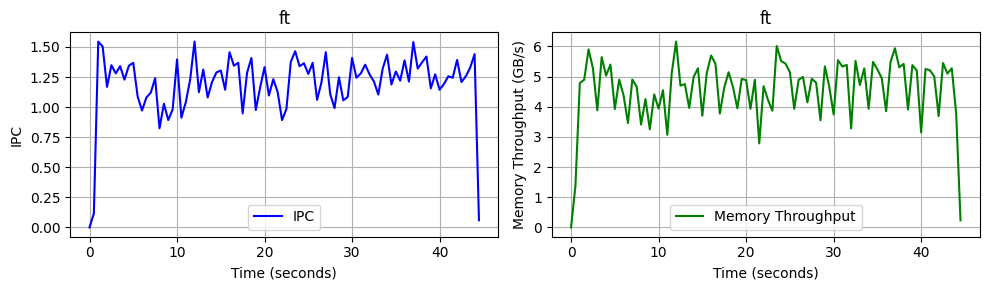

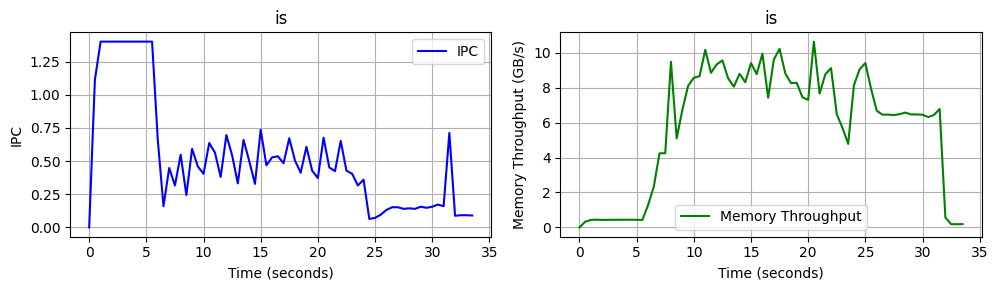

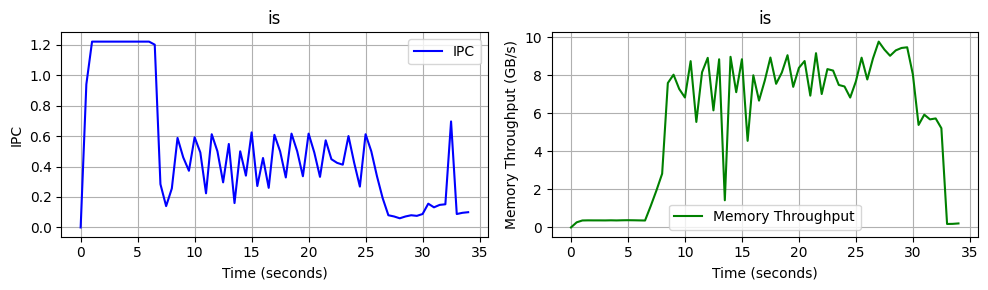

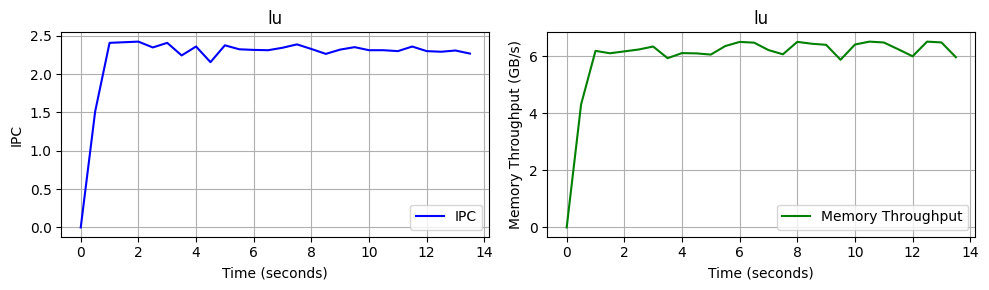

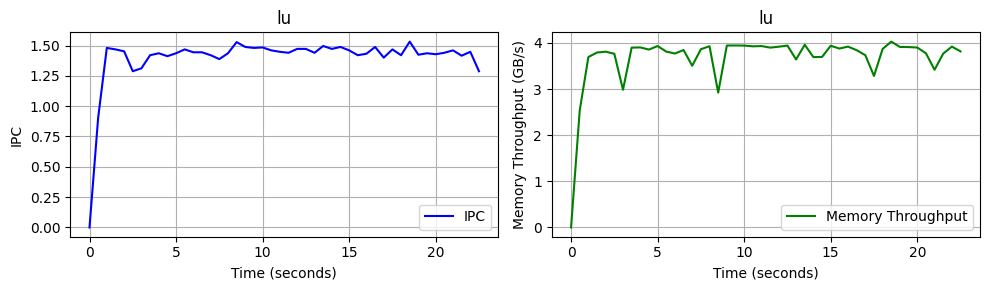

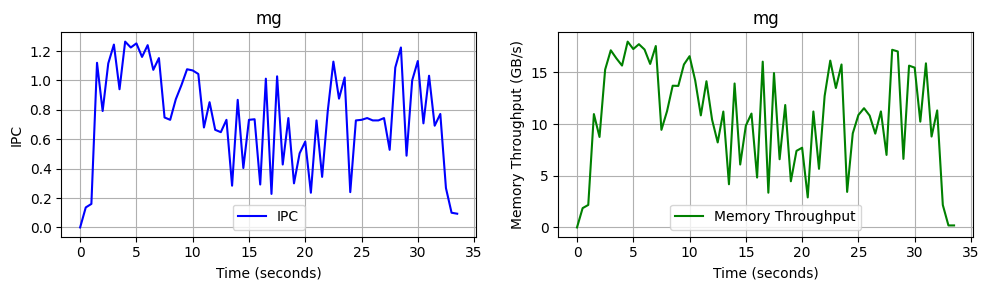

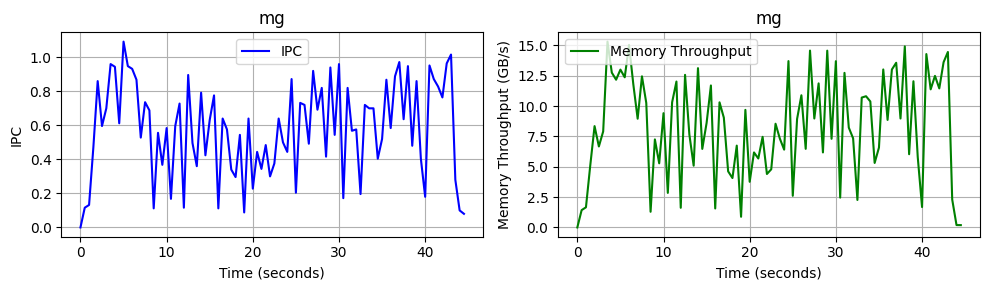

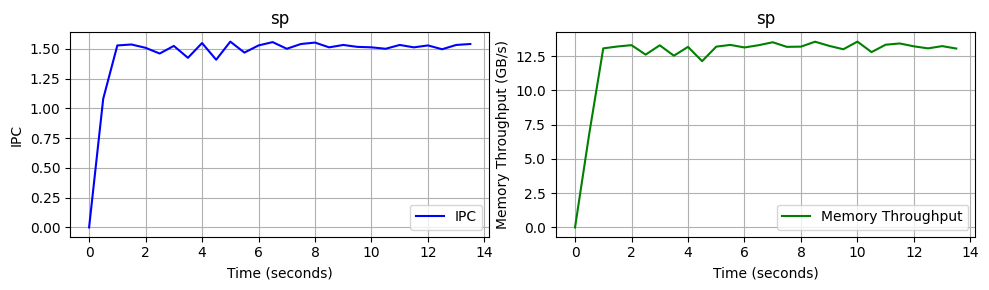

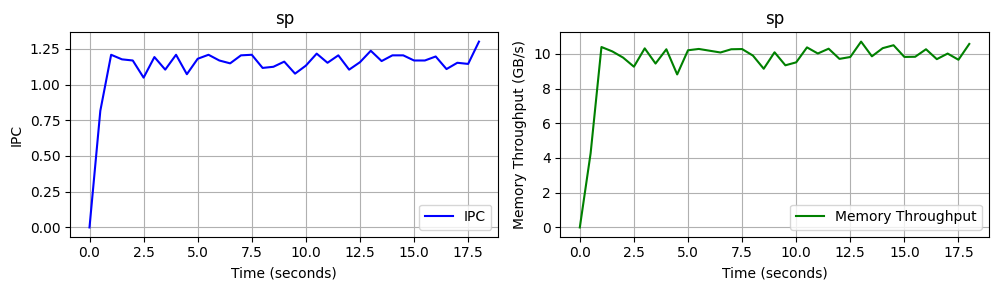

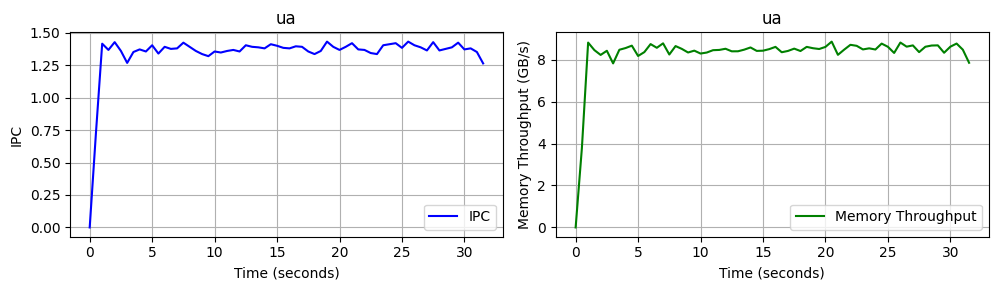

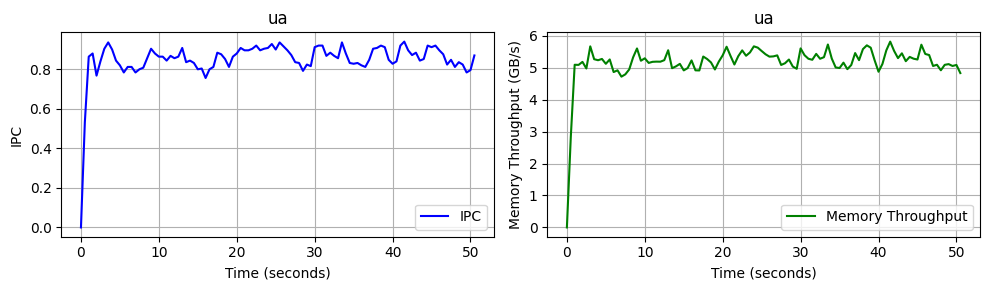

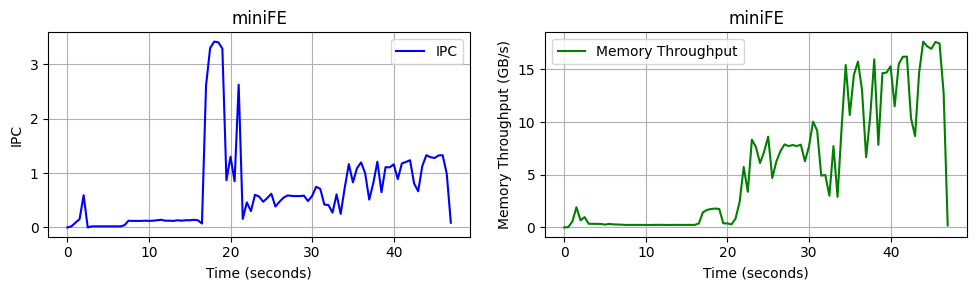

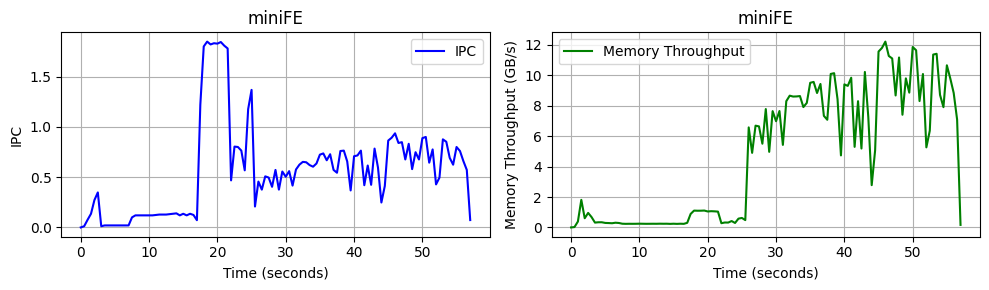

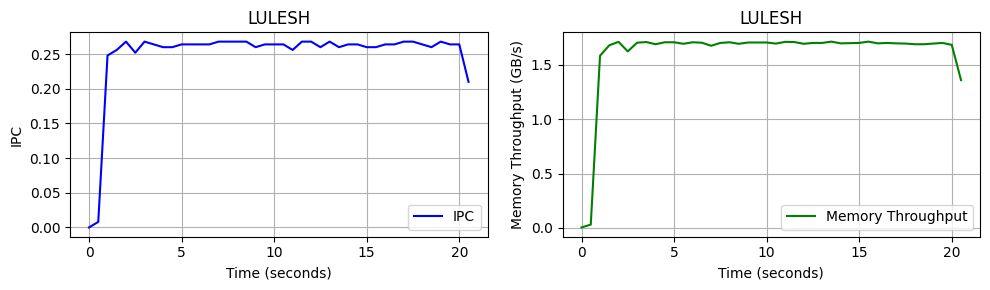

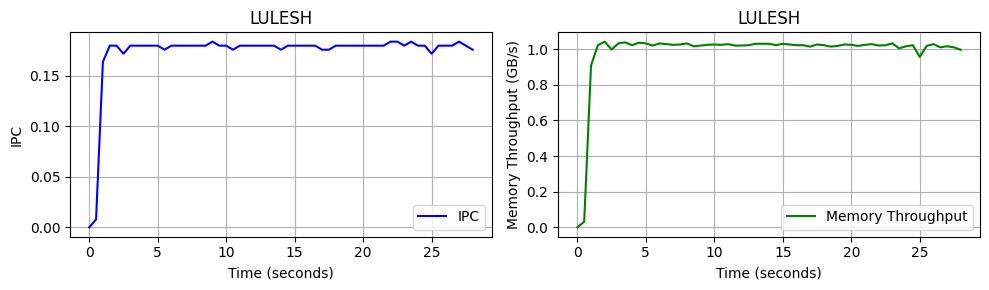

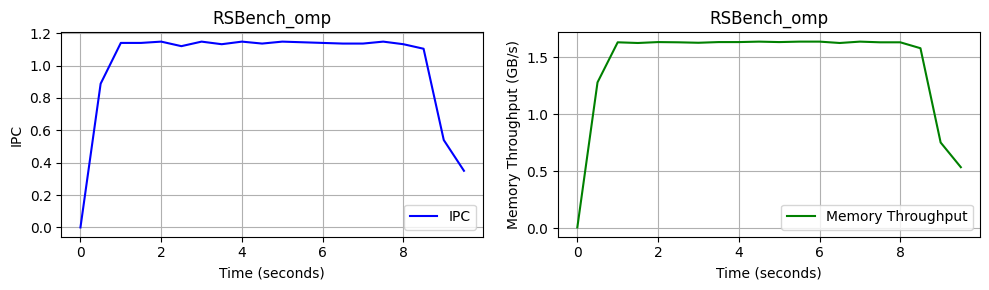

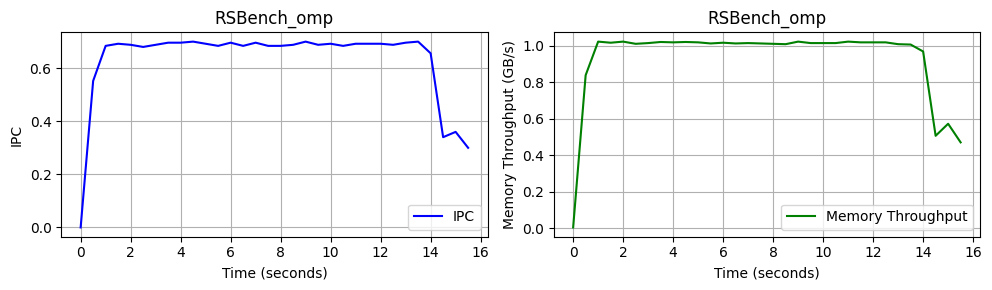

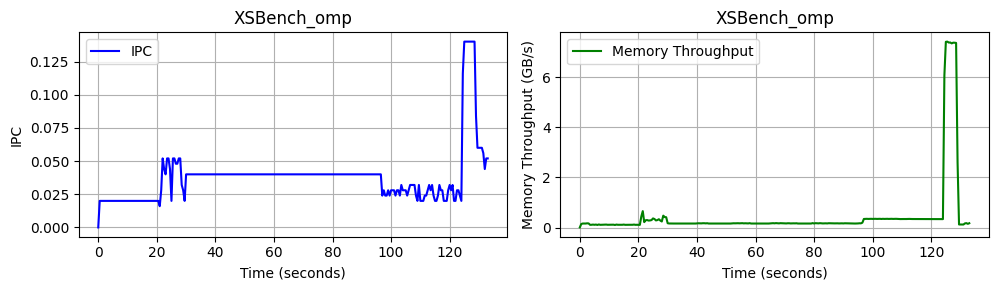

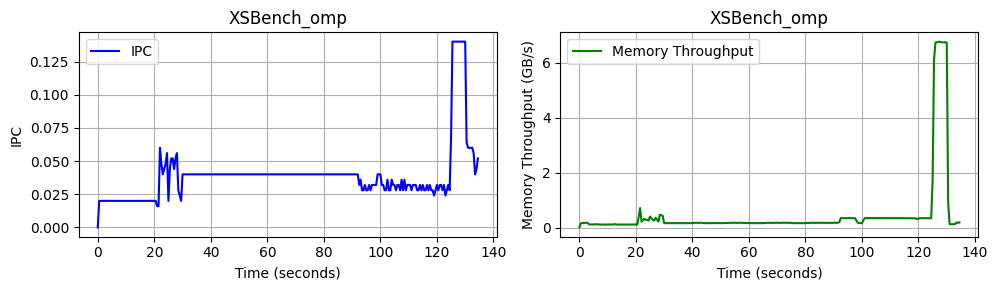

In [6]:
npb_benchmarks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp', 'ua', 'miniFE','LULESH','RSBench_omp','XSBench_omp']

# List of CPU capacities
# cpu_caps = [80, 100, 120, 140, 160, 180, 200, 220, 240, 250]
cpu_caps = [250,160]
# Iterate through each benchmark and capacity to generate plots
base_dir = './cpu_performance'
for app in npb_benchmarks:
    for cap in cpu_caps:
        file_path = f'{base_dir}/{app}/pcm_{app}_{cap}.csv'
        plot_graphs(file_path,app)


In [15]:
def plot_IPC_power(app):
    directory = './cpu_performance/' + app + "/"
    
    # Lists to store power values and IPC values
    powers = []
    ipcs = []
    
    # Process each CSV file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            
            # Extract power value from the filename
            power = filename.split('_')[2].split('.')[0]
            powers.append(float(power))
            
            # Load the CSV file with correct headers
            data = pd.read_csv(filepath, header=[1])
            
            # Calculate the total number of rows
            total_rows = len(data)
            
            # Calculate the starting index for the last 80% of the rows
            start_index = int(total_rows * 0.01)
            
            # Select the last 80% of the rows
            subset_data = data.iloc[start_index:]
            
            # Extract the 'EXEC' column and convert it to numeric
            exec_values = pd.to_numeric(subset_data['EXEC'])
            
            # Calculate the average value of 'EXEC' multiplied by 2
            average_exec_x2 = exec_values.mean() * 2
            ipcs.append(average_exec_x2)
    
    # Sorting the data by power values for a smoother line plot
    sorted_data = sorted(zip(powers, ipcs))
    powers, ipcs = zip(*sorted_data)
    
    # Calculate the baseline IPC (largest power cap)
    baseline_ipc = max(ipcs)
    
    # Calculate normalized IPCs
    normalized_ipcs = [ipc / baseline_ipc for ipc in ipcs]
    
    # Plotting the results using a line chart
    plt.figure(figsize=(6, 6))
    plt.plot(powers, normalized_ipcs, color='blue', marker='o', linestyle='-')
    plt.title('Power cap vs Normalized IPC')
    plt.xlabel('Power cap')
    plt.ylabel('Normalized IPC')
    plt.grid(True)
    plt.show()

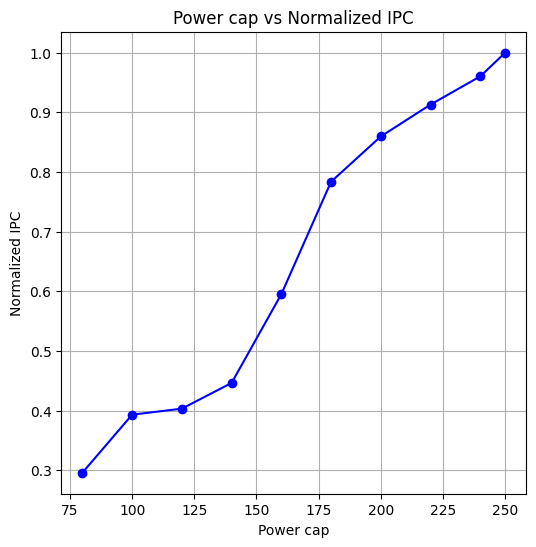

In [16]:
plot_IPC_power("cg")

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial fitting function
def fit_data_polynomial(x_data, y_data, degree, max_x):
    coefficients = np.polyfit(x_data, y_data, degree)
    polynomial = np.poly1d(coefficients)
    
    # Compute the original y_fit values
    y_fit = polynomial(x_data)
    
    # Adjust y_fit to make the rightmost point equal to 1
    shift = 1 - polynomial(max_x)
    y_fit += shift
    
    return y_fit

# Function to plot IPC vs Power cap for multiple applications on the same plot
def plot_IPC_power(applications,size):
    plt.figure(figsize=(8, 8))
    
    # Define markers and colors
    markers =['o', 's', 'D', '^', 'x', '+', '*', '<', '>', 'o', 's', 'D', '^', 'x', '+']

    for idx, app in enumerate(applications):
        if size=="big":
            directory = './cpu_performance/big/' + app + "/"
        else:
            directory = './cpu_performance/small/' + app + "/"
        
        # Lists to store power values and IPC values
        powers = []
        ipcs = []
        
        # Process each CSV file in the directory
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                filepath = os.path.join(directory, filename)
                
                # Extract power value from the filename
                power = filename.split('_')[-1].split('.')[0]
                powers.append(float(power))
                
                # Load the CSV file with correct headers
                data = pd.read_csv(filepath, header=[1])
                
                # Calculate the total number of rows
                total_rows = len(data)
                
                # Calculate the starting index for the last 80% of the rows
                start_index = int(total_rows * 0.01)
                
                # Select the last 80% of the rows
                subset_data = data.iloc[start_index:]
                
                # Extract the 'EXEC' column and convert it to numeric
                exec_values = pd.to_numeric(subset_data['EXEC'])
                
                # Calculate the average value of 'EXEC' multiplied by 2
                average_exec_x2 = exec_values.mean() * 2
                ipcs.append(average_exec_x2)
        
        # Sorting the data by power values for a smoother line plot
        sorted_data = sorted(zip(powers, ipcs))
        powers, ipcs = zip(*sorted_data)
        
        # Calculate the baseline IPC (largest power cap)
        baseline_ipc = max(ipcs)
        
        # Calculate normalized IPCs
        normalized_ipcs = [ipc / baseline_ipc for ipc in ipcs]
        
        # Fit the polynomial curve
        degree = 5
        y_fit = fit_data_polynomial(powers, normalized_ipcs, degree, max(powers))
        
        # Plotting the results using a line chart with markers
        plt.plot(powers, y_fit, linestyle='-', marker=markers[idx % len(markers)], label=f'{app}')
    
    plt.title('Power cap vs Normalized IPC')
    plt.xlabel('Power cap')
    plt.ylabel('Normalized IPC')
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_mem_power(applications,size):
    plt.figure(figsize=(8, 8))
    
    # Define markers and colors
    markers = ['o', 's', 'D', '^', 'x', '+', '*', '<', '>', 'o', 's', 'D', '^', 'x', '+']

    for idx, app in enumerate(applications):
        if size=="big":
            directory = './cpu_performance/big/' + app + "/"
        else:
            directory = './cpu_performance/small/' + app + "/"
        
        # Lists to store power values and IPC values
        powers = []
        mem_throughputs = []
        
        # Process each CSV file in the directory
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                filepath = os.path.join(directory, filename)
                
                # Extract power value from the filename
                power = filename.split('_')[-1].split('.')[0]
                powers.append(float(power))
                
                # Load the CSV file with correct headers
                data = pd.read_csv(filepath, header=[1])
                
                # Calculate the total number of rows
                total_rows = len(data)
                
                # Calculate the starting index for the last 80% of the rows
                start_index = int(total_rows * 0.01)
                
                # Select the last 80% of the rows
                subset_data = data.iloc[start_index:]
                
                # Extract the 'READ' and 'WRITE' columns and convert them to numeric
                read_values = pd.to_numeric(subset_data['READ'])
                write_values = pd.to_numeric(subset_data['WRITE'])
                
                # Calculate the memory throughput as the sum of 'READ' and 'WRITE' values
                mem_throughput = (read_values + write_values).mean()
                mem_throughputs.append(mem_throughput)
        
        # Sorting the data by power values for a smoother line plot
        sorted_data = sorted(zip(powers, mem_throughputs))
        powers, mem_throughputs = zip(*sorted_data)
        
        # Calculate the baseline memory throughput (largest power cap)
        baseline_throughput = max(mem_throughputs)
        
        # Calculate normalized memory throughputs
        normalized_throughputs = [throughput / baseline_throughput for throughput in mem_throughputs]
        
        # Fit the polynomial curve
        degree = 5
        y_fit = fit_data_polynomial(powers, normalized_throughputs, degree, max(powers))
        
        # Plotting the results using a line chart with markers
        plt.plot(powers, y_fit, linestyle='-', marker=markers[idx % len(markers)], label=f'{app}')
    
    plt.title('Power cap vs Normalized Memory Throughput')
    plt.xlabel('Power cap')
    plt.ylabel('Normalized Memory Throughput')
    plt.grid(True)
    plt.legend()
    plt.show()

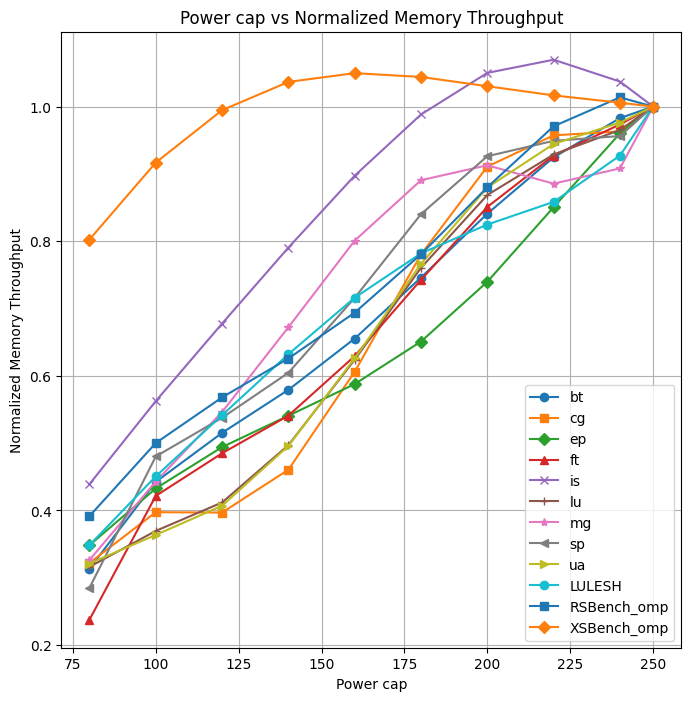

In [23]:
npb_benchmarks =['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp', 'ua','LULESH','RSBench_omp','XSBench_omp']
plot_mem_power(npb_benchmarks,'big')

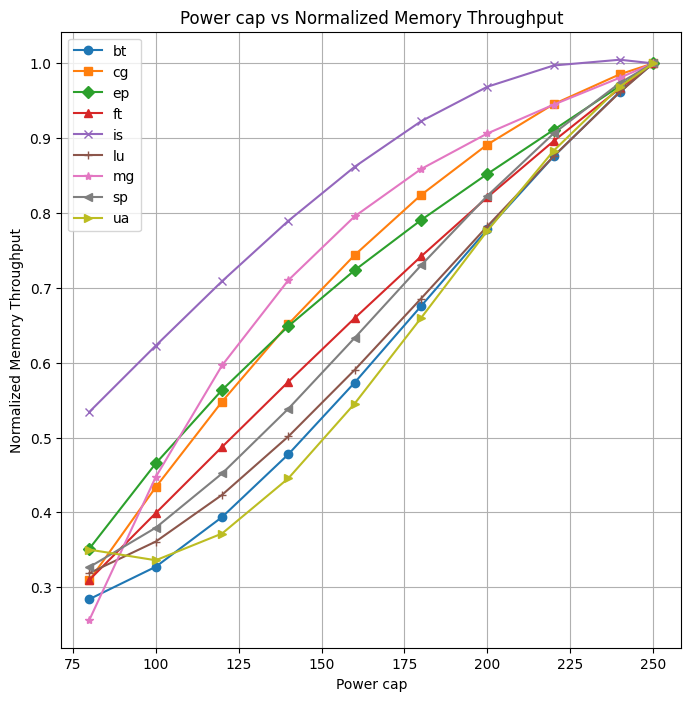

In [4]:
npb_benchmarks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp', 'ua']
plot_mem_power(npb_benchmarks,'small')

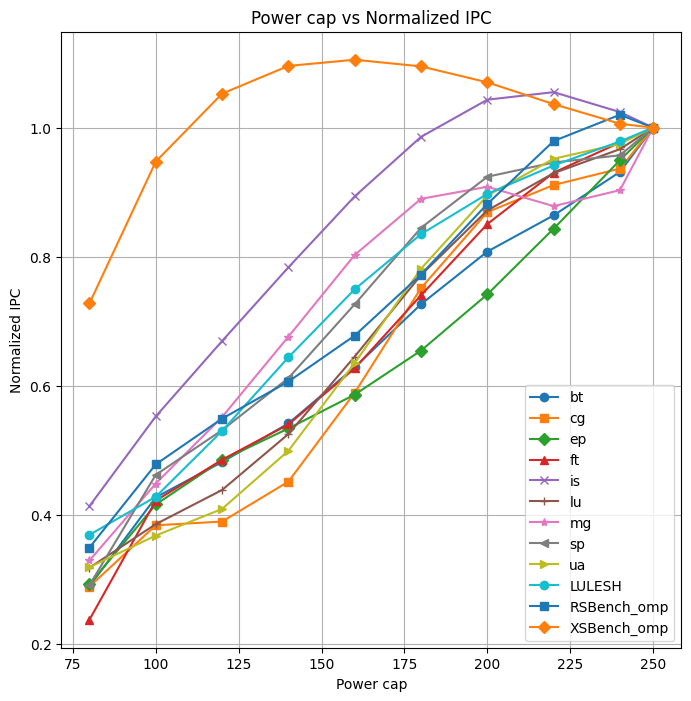

In [21]:
npb_benchmarks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp', 'ua','LULESH','RSBench_omp','XSBench_omp']
# npb_benchmarks=['is']
plot_IPC_power(npb_benchmarks,"big")

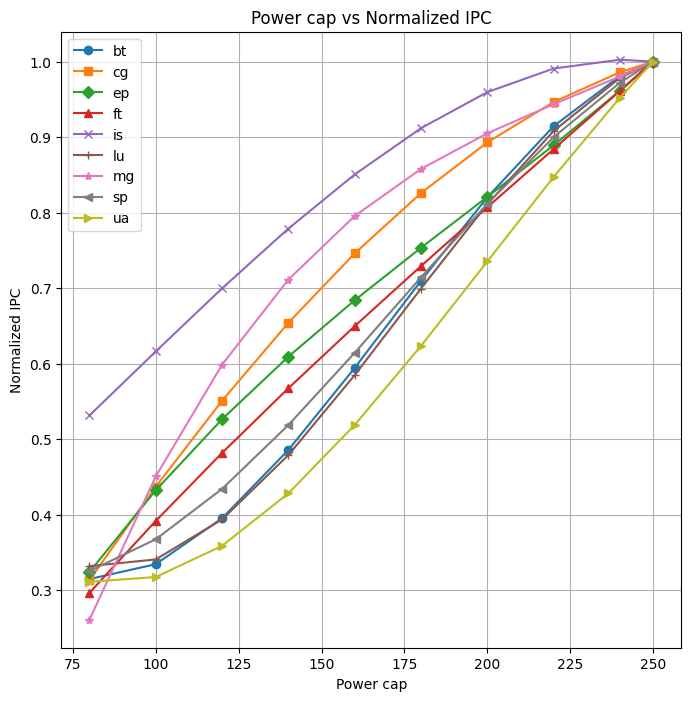

In [35]:
npb_benchmarks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp', 'ua']
# npb_benchmarks =['is']
plot_IPC_power(npb_benchmarks, "small")